In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

In [2]:
companies = ['GOOGL','AMD','AMZN','AAPL','MSFT']
data = yf.download(companies, start = '2022-01-01', end = '2022-12-31')
myDatabase = data[['Open','High','Low','Close']]

[*********************100%***********************]  5 of 5 completed


In [3]:
ratios = [0.35, 0.5, 1, 3.5]

No_of_companies = len(companies)
ratio_types = ["Open Close Ratio","Open Low Ratio","High Low Ratio","High Close Ratio"]

# Initializing the count arrays as zero
Open_Close_Count = [[0 for _ in range(No_of_companies)] for _ in range(len(ratios))]
Open_Low_Count = [[0 for _ in range(No_of_companies)] for _ in range(len(ratios))]
High_Low_Count = [[0 for _ in range(No_of_companies)] for _ in range(len(ratios))]
High_Close_Count = [[0 for _ in range(No_of_companies)] for _ in range(len(ratios))]



for _, row in myDatabase.iterrows():
        
        # Inputting the different stock values
        open_price = row['Open']    # storing values in the array for diff companies
        close_price = row['Close']
        low_price = row['Low']
        high_price = row['High']
        
        # Calculating the diff ratios for each day
        open_close_ratio = open_price / close_price
        open_low_ratio = open_price / low_price
        high_low_ratio = high_price / low_price
        high_close_ratio = high_price / close_price
        
        #print(open_price)
        
        # Updating the count arrays
        for i in range(len(ratios)):
            for j in range(No_of_companies):
                if(0.999 * ratios[i] < open_close_ratio[j] < 1.001 * ratios[i]):
                    Open_Close_Count[i][j] +=1
                if(0.999 * ratios[i] < open_low_ratio[j] < 1.001 * ratios[i]):
                     Open_Low_Count[i][j] +=1
                if(0.999 * ratios[i] < high_low_ratio[j] < 1.001 * ratios[i]):
                     High_Low_Count[i][j] +=1
                if(0.999 * ratios[i] < high_close_ratio[j] < 1.001 * ratios[i]):
                     High_Close_Count[i][j] +=1
                
# Printing the values
for i in range(No_of_companies):  #iterates through different companies
    print(f"----------------------------------------STOCK {companies[i]}--------------------------------------------")
    
    # for Open_Close_Count
    for j in range(len(ratios)):  #iterates through diff ratio values of ratios
        print(f"Count of {ratios[j]} = {Open_Close_Count[j][i]}")
    print("")
    
    # for Open_Low_Count
    for j in range(len(ratios)):
        print(f"Count of {ratios[j]} = {Open_Low_Count[j][i]}")
    print("")
    
    # for High_Low_Count
    for j in range(len(ratios)):
        print(f"Count of {ratios[j]} = {High_Low_Count[j][i]}")
    print("")
    
    # for High_Close_Count
    for j in range(len(ratios)):
        print(f"Count of {ratios[j]} = {High_Close_Count[j][i]}")
    print("")

----------------------------------------STOCK GOOGL--------------------------------------------
Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 6
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 13
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 0
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 22
Count of 3.5 = 0

----------------------------------------STOCK AMD--------------------------------------------
Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 14
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 6
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 0
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 10
Count of 3.5 = 0

----------------------------------------STOCK AMZN--------------------------------------------
Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 6
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 = 0
Count of 1 = 8
Count of 3.5 = 0

Count of 0.35 = 0
Count of 0.5 

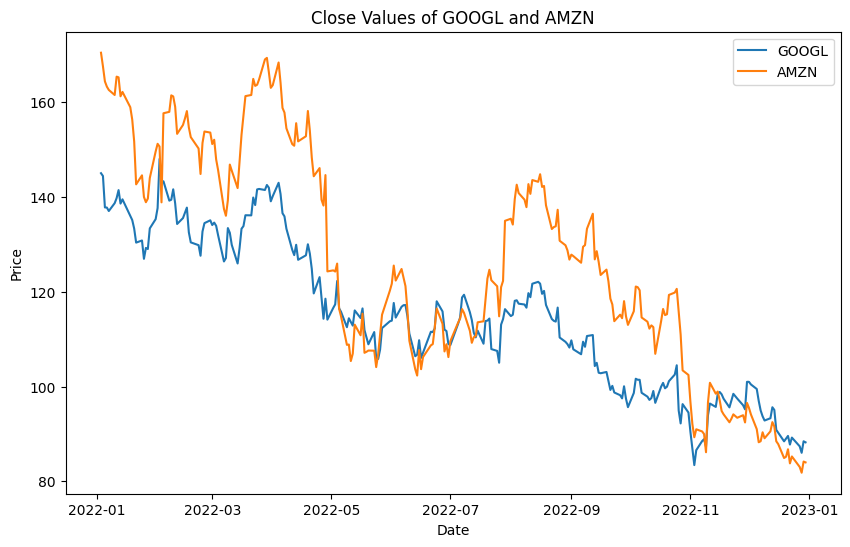

In [4]:
import matplotlib.pyplot as plt
# Extracting Open and Close values from the database In an array
close_values_GOOGL = myDatabase['Close']['GOOGL']
close_values_AMZN = myDatabase['Close']['AMZN']

# Extracting date as index
dates = myDatabase.index

# Plotting the Close valuesc of the two companies
plt.figure(figsize=(10, 6))
plt.plot(dates, close_values_GOOGL, label='GOOGL')
plt.plot(dates, close_values_AMZN, label='AMZN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Values of GOOGL and AMZN')
plt.legend()
plt.show()

In [5]:
#*The line graph shows the closing prices of Google(GOOGL) and Amazon(AMZN) over the time period from Jan 2022 to Jan 2023.
#*The graph allows for a direct comparison of the two stocks' price movements.
#*Upward trends in the line graph indicate periods of price appreciation, while downward trends suggest price depreciation.
#*If the lines move in a similar direction and are relatively close together, it indicates a correlation between the two stocks' prices.
#*Divergence between the lines suggests differing price movements between the stocks.
#*By observing the graph, you can identify significant price changes, such as sharp increases or decreases, and periods of stability.
#*It is essential to consider external factors, such as news events or market trends, that may have influenced the stock prices during the analyzed period.

In [ ]:
import finplot as fplt
import yfinance as yf
amd_data = yf.download("AMD", start="2022-01-01", end="2022-12-31")
fplt.candlestick_ochl(amd_data[['Open', 'Close', 'High', 'Low']])
fplt.show()

In [ ]:
#*The candlestick chart displays the high and low prices of AMD over the specified time.
#*Each candlestick represents a trading day, with the vertical lines indicating the high and low prices for that day.
#*The color of the candlestick body represents whether the closing price is higher (green) or lower (red) than the opening price.
#*By analyzing the chart, you can identify trends, volatility, and potential support/resistance levels in the stock's price movements.
#*If you observe longer green candlesticks with small or no lower shadows, it indicates bullish periods with strong buying momentum.
#*On the other hand, longer red candlesticks with small or no upper shadows suggest bearish periods with selling pressure dominating the market.
#*You can also identify periods of price consolidation or indecision when the candlestick bodies are small and the shadows are relatively longer.